## 0. Install Stuff

In [ ]:
# Install the prerequisites

!pip3 install open3d
!pip3 install numpy
!pip3 install matplotlib

## 1. Import Stuff

In [2]:
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## 2. Get the file path

In [41]:
# update the path to the file location of cave.xyz added to the repository in your PC
# for example, mine is as below-
pcl_path=r"..../point_cloud_RANSAC/data/cave.xyz"


## 3. Store the point cloud in a variable

In [35]:
cave_pcl =o3d.io.read_point_cloud(pcl_path)

In [5]:
type(cave_pcl)

open3d.cpu.pybind.geometry.PointCloud

## 4. Visualize the Point Cloud in Raw. 

You should see RGB segmentation based on depth like the figure below-

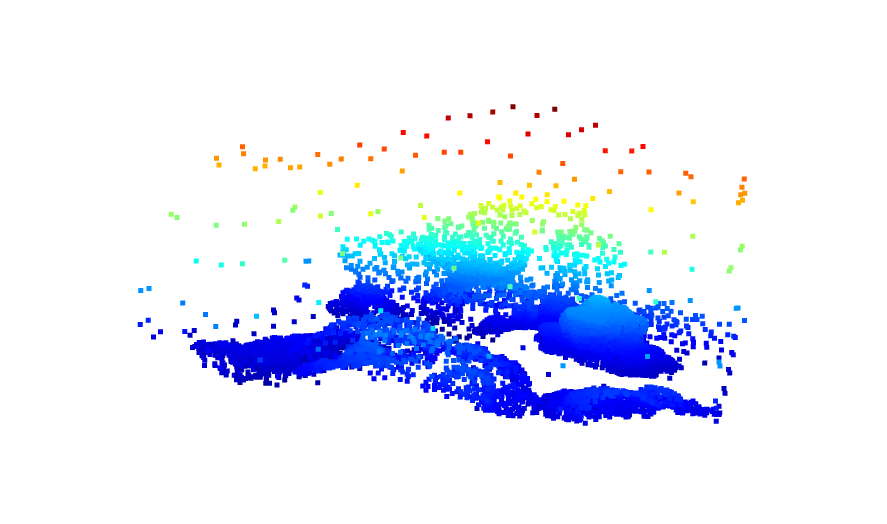

In [36]:
# bring up interactive visualization
o3d.visualization.draw_geometries([cave_pcl])

## 5. Now, we can kinda normalize the computation using K-Dimensional Tree Search [Optional]

In [37]:
cave_pcl.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=16), fast_normal_computation=True)
cave_pcl.paint_uniform_color([0.0, 0.6, 0.0]) #applying a homogenous colour to all the points in the point cloud

PointCloud with 16584 points.

In [38]:
# visualize again
o3d.visualization.draw_geometries([cave_pcl])

The result should look something like this-

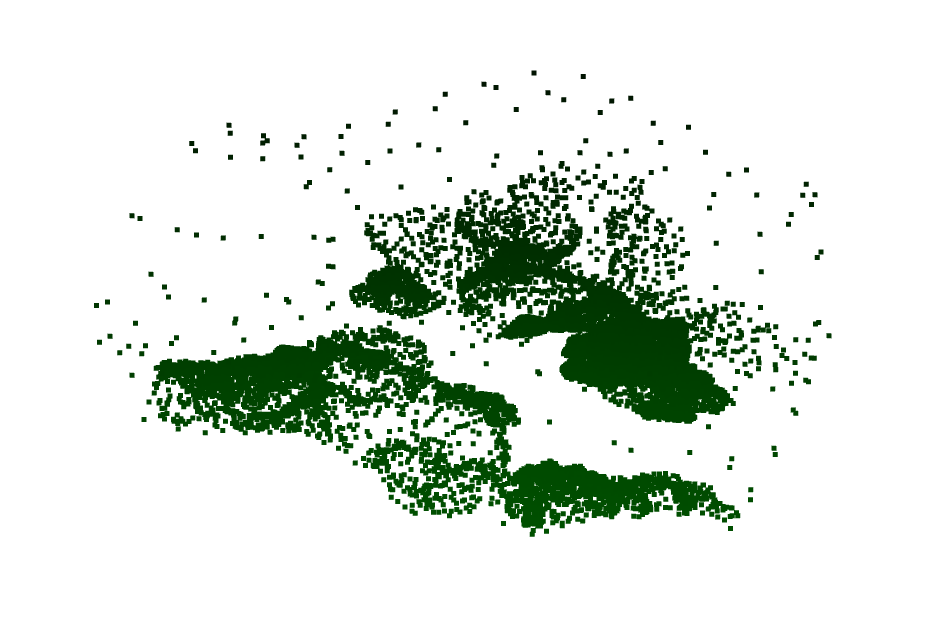

## 6. 3D Shape detection using RAndom SAmple Consensus (RANSAC)

The result should look something like this-

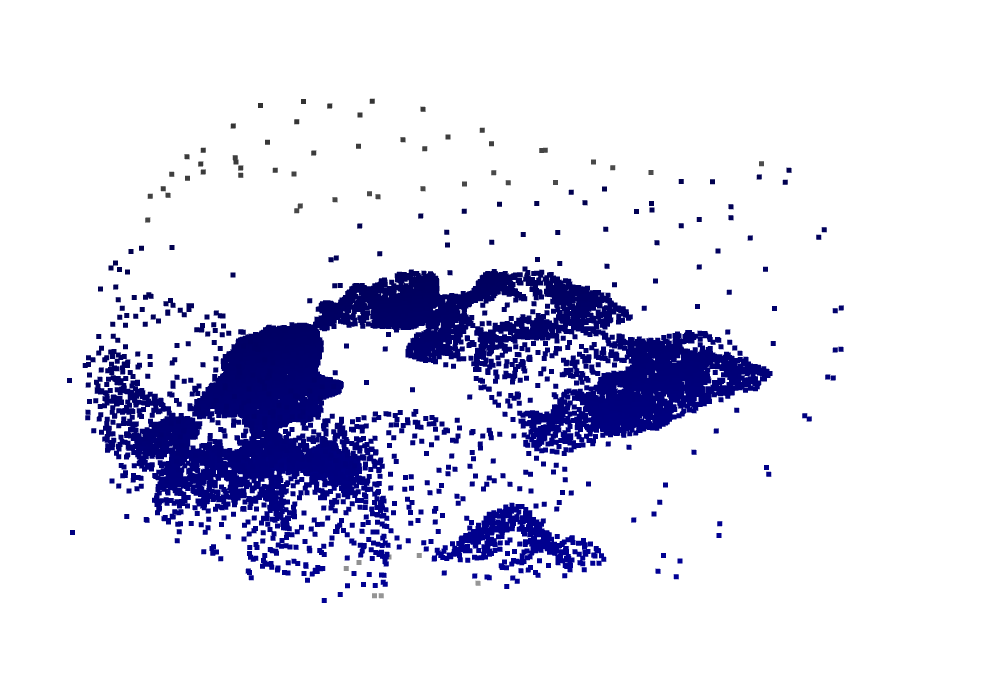

In [39]:
# detect planes and shapes
# note the the threshold I'm applying is very high, as the point cloud I had recorded was dispersed at very long distances resulting in huge distance between the points
# usually, the threshold could be in the below 1.00 range for typical denser point clouds
# note that this threshold is usually a result of a trial and error iterative approach

plane, object= cave_pcl.segment_plane(distance_threshold=480.16,ransac_n=3,num_iterations=1000)
[a, b, c, d] = plane
print(f"Plane equation: {a:.2f}x + {b:.2f}y + {c:.2f}z + {d:.2f} = 0")

# object cloud consists of the shapes detected
object_cloud = cave_pcl.select_by_index(object)

# noise cloud is everything that is not detected as a shape
# by using invert=True, we state that everything that is not object, gets passed into noise_cloud
noise_cloud = cave_pcl.select_by_index(object, invert=True)

# detected shapes are in blue
object_cloud.paint_uniform_color([0.0, 0, 1.0])

# noise cloud is in white, so it can kinda blends in with the background
noise_cloud.paint_uniform_color([1.0, 1.0, 1.0])
o3d.visualization.draw_geometries([object_cloud, noise_cloud])

Plane equation: -0.06x + 0.02y + 1.00z + -77.41 = 0


## 7. DBSCAN Clustering (AKA Euclidean Clustering)

* DBSCAN stands for Density-based spatial clustering of applications with noise
* Iterates over individual points 
* Clusters points based on radial distance, eps and mininum number of neighbouring points, min_points
* Noise points have very little point density, so they get excluded

In [40]:
# Excluding noise_cloud

# Auto detection of clusters based on given values of eps and min_points
labels = np.array(object_cloud.cluster_dbscan(eps=70.05, min_points=8))

# labels range between -1 to n; -1 for noise
max_label = labels.max()
print(f"point cloud has {max_label + 1} clusters")

# colour 'em up
colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))
# noise_cluster is white
colors[labels < 0] = 1
object_cloud.colors = o3d.utility.Vector3dVector(colors[:, :3])

o3d.visualization.draw_geometries([object_cloud])

point cloud has 14 clusters


## 8. Final results

Before-

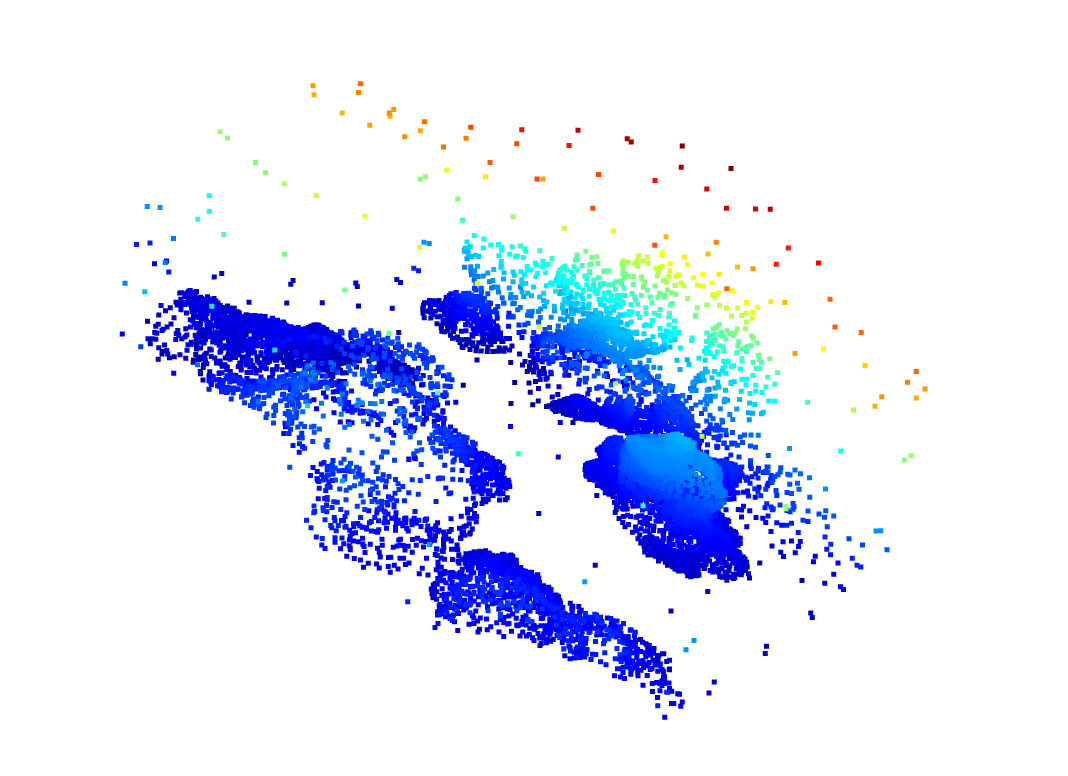

After -

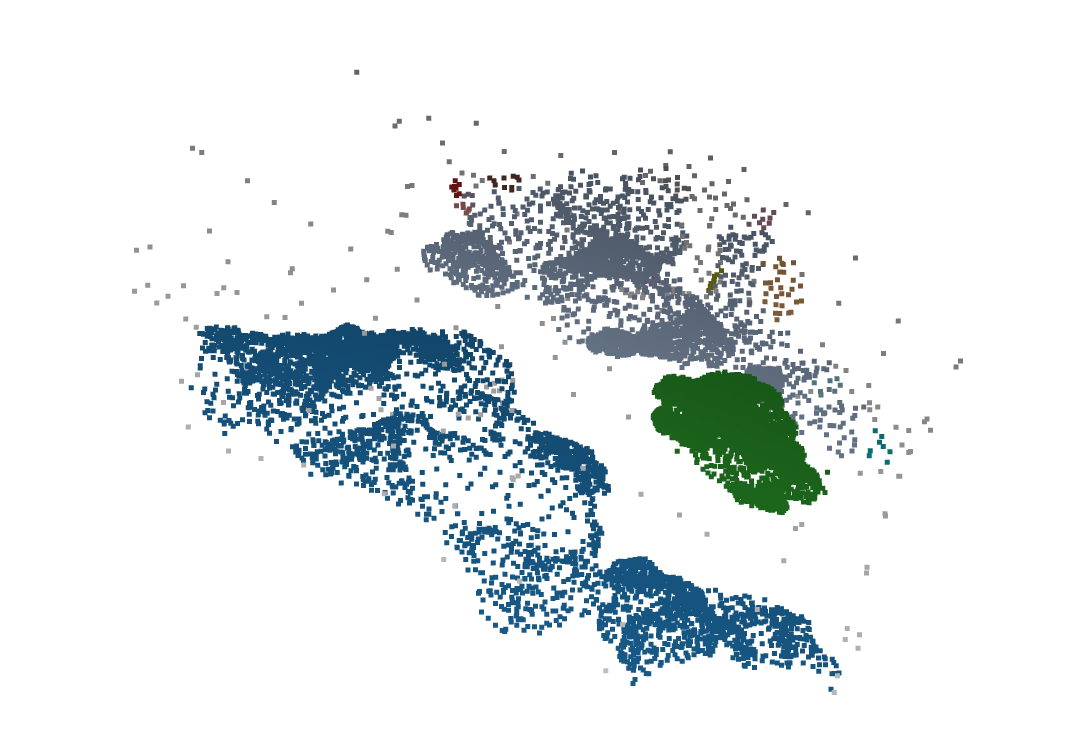